In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as mplcolors

In [2]:
df_data = pd.read_csv("Results/data_2021.csv")


In [3]:
provinces = list(map(lambda x: x.upper(), df_data['Province'].to_list()))
df_data['Province'] = provinces
df_scores = pd.DataFrame()
df_scores['Province'] = df_data['Province']
df_scores['Index'] = df_data['Index']

In [4]:
def convert_to_english(lst):
    # Define a dictionary for Turkish to English character conversion
    tr_to_en = {
        'ğ': 'g',
        'Ğ': 'G',
        'ş': 's',
        'Ş': 'S',
        'ı': 'i',
        'İ': 'I',
        'ö': 'o',
        'Ö': 'O',
        'ü': 'u',
        'Ü': 'U',
        'ç': 'c',
        'Ç': 'C'
    }

    # Use a list comprehension to iterate through each word and each character in the list
    # Replace Turkish characters with English counterparts
    return [''.join([tr_to_en[char] if char in tr_to_en else char for char in word]) for word in lst]

# Test the function
words_with_turkish_chars = ["şişe", "ağaç", "öğrenci", "üzüm", "İstanbul"]
print(convert_to_english(words_with_turkish_chars))


['sise', 'agac', 'ogrenci', 'uzum', 'Istanbul']


In [5]:
provinces_en = convert_to_english(df_scores['Province'].to_list())
df_scores['Province'] = provinces_en
df_scores

Province  Index
0            ADANA  32.69
1         ADIYAMAN  13.82
2   AFYONKARAHISAR  41.59
3          AKSARAY  26.92
4           AMASYA  33.99
..             ...    ...
76           CORUM  36.32
77        ISTANBUL  54.97
78           IZMIR  50.12
79       SANLIURFA  15.66
80          SIRNAK   0.00

[81 rows x 2 columns]

In [7]:
shp_tur = gpd.GeoDataFrame()
shp_tur = gpd.read_file("turkey_shape_files/tur.shx")
shp_tur.head()

adm1_tr         adm1_en    adm1  Shape_Leng  Shape_Area adm0_en  \
0            ADANA           ADANA  TUR001    8.271786    1.407083  TURKEY   
1         ADIYAMAN        ADIYAMAN  TUR002    5.494422    0.750561  TURKEY   
2  AFYONKARAHÄ°SAR  AFYONKARAHISAR  TUR003    7.149996    1.450064  TURKEY   
3            AÄRI            AGRI  TUR004    6.588304    1.163170  TURKEY   
4          AKSARAY         AKSARAY  TUR068    4.432509    0.790388  TURKEY   

     adm0_tr adm0                                           geometry  
0  TÃRKÄ°YE  TUR  POLYGON ((36.31587 38.36376, 36.31769 38.36367...  
1  TÃRKÄ°YE  TUR  POLYGON ((39.25297 38.18188, 39.25334 38.18159...  
2  TÃRKÄ°YE  TUR  POLYGON ((31.14797 39.26246, 31.15825 39.25753...  
3  TÃRKÄ°YE  TUR  POLYGON ((43.28706 40.01281, 43.29129 40.00884...  
4  TÃRKÄ°YE  TUR  POLYGON ((33.96446 39.03804, 33.96453 39.03723...

In [8]:
merged = shp_tur.set_index('adm1_en').join(df_scores.set_index('Province'))
merged.drop(columns=['adm1_tr', 'adm0_tr'], axis=1, inplace=True)
merged.head()

adm1  Shape_Leng  Shape_Area adm0_en adm0  \
adm1_en                                                       
ADANA           TUR001    8.271786    1.407083  TURKEY  TUR   
ADIYAMAN        TUR002    5.494422    0.750561  TURKEY  TUR   
AFYONKARAHISAR  TUR003    7.149996    1.450064  TURKEY  TUR   
AGRI            TUR004    6.588304    1.163170  TURKEY  TUR   
AKSARAY         TUR068    4.432509    0.790388  TURKEY  TUR   

                                                         geometry  Index  
adm1_en                                                                   
ADANA           POLYGON ((36.31587 38.36376, 36.31769 38.36367...  32.69  
ADIYAMAN        POLYGON ((39.25297 38.18188, 39.25334 38.18159...  13.82  
AFYONKARAHISAR  POLYGON ((31.14797 39.26246, 31.15825 39.25753...  41.59  
AGRI            POLYGON ((43.28706 40.01281, 43.29129 40.00884...  12.81  
AKSARAY         POLYGON ((33.96446 39.03804, 33.96453 39.03723...  26.92

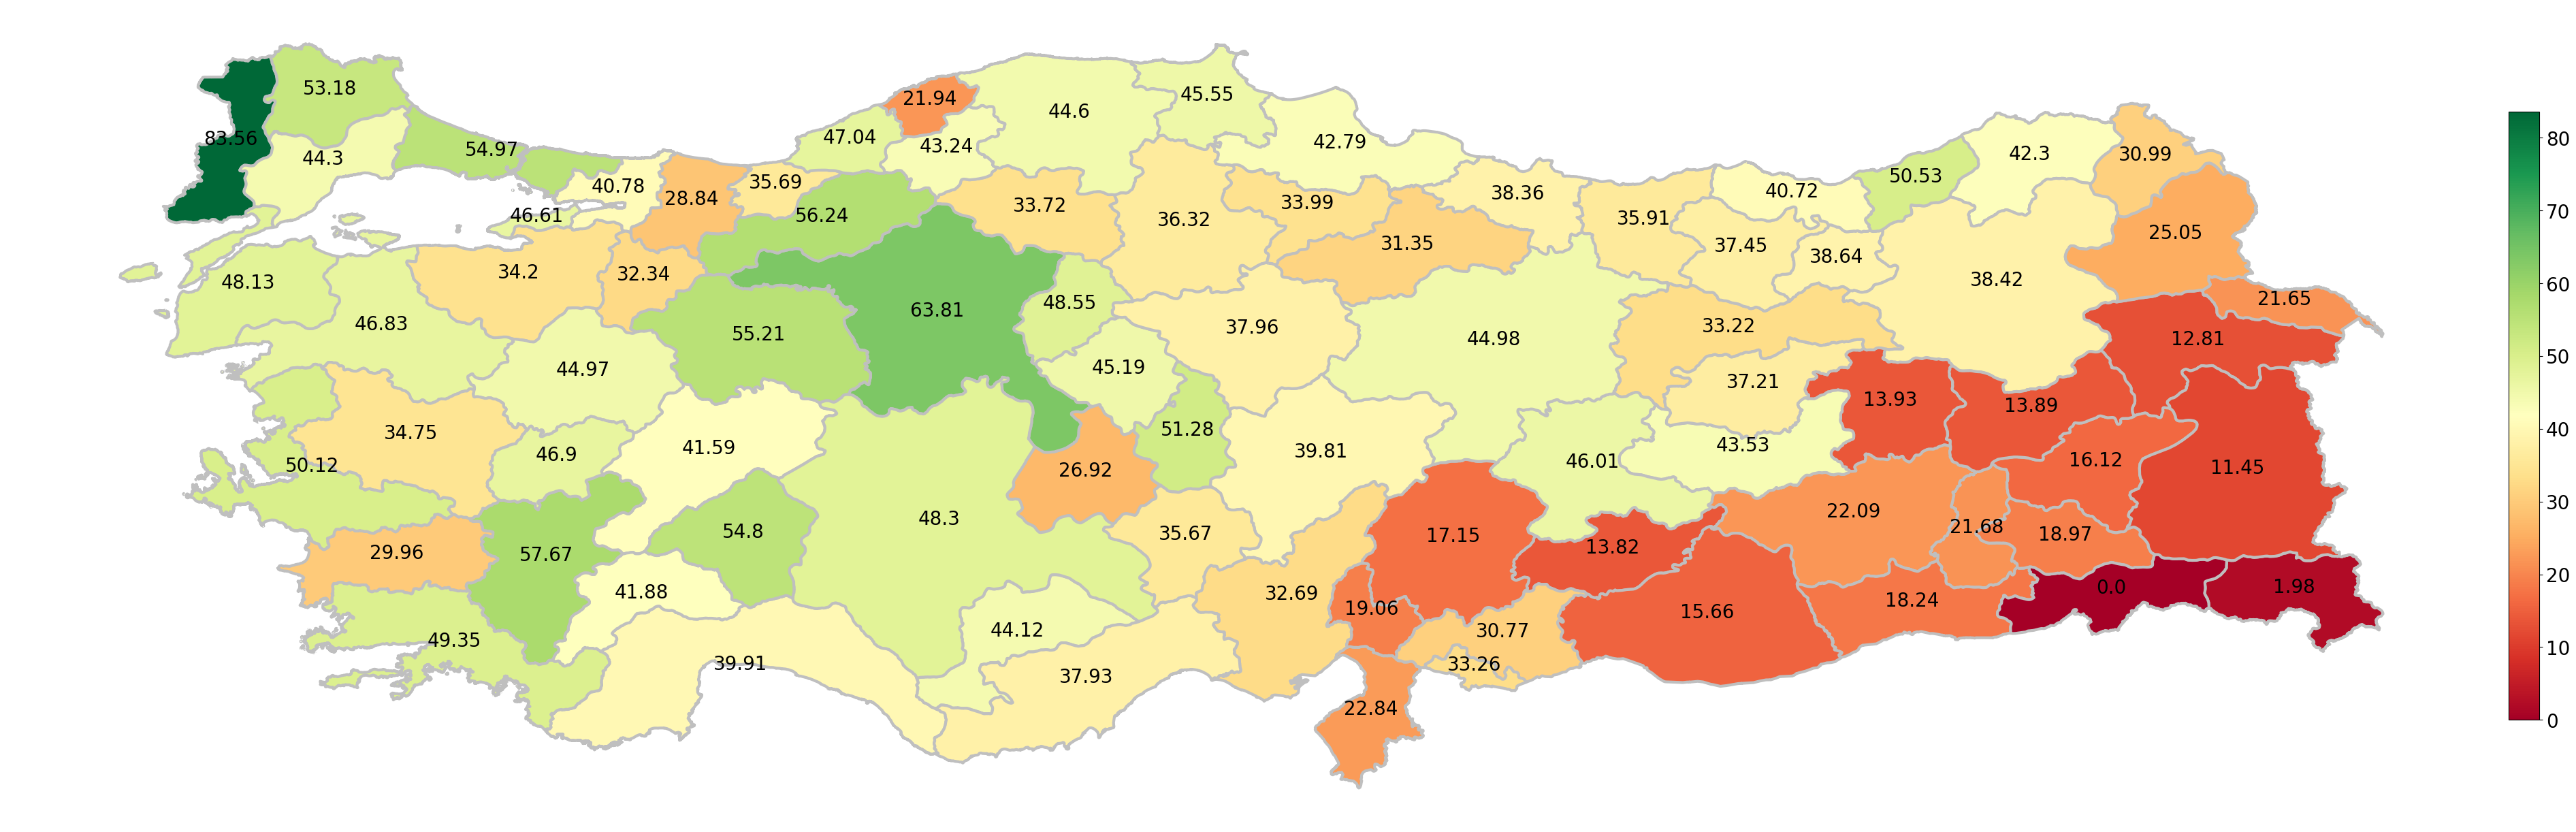

In [22]:
fig, ax = plt.subplots(1, figsize=(48, 48))
ax.axis('off')
#ax.set_title('Livability of Turkish Provinces in 2021',
#             fontdict={'fontsize': '18', 'fontweight' : '8'}, y=1.2)
fig = merged.plot(column='Index', cmap='RdYlGn', linewidth=3.0, ax=ax, edgecolor='0.75')

norm = mplcolors.Normalize(vmin=merged['Index'].min(), vmax=merged['Index'].max())
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='RdYlGn'), 
             ax=ax, location='right', shrink=0.5, pad=0.005, fraction=0.012)

for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)

merged.apply(lambda x: ax.annotate(text=x['Index'],
                                   xy=(x['geometry'].centroid.x,x['geometry'].centroid.y), ha='center',
                                  fontsize=20), axis=1)

plt.show()
#plt.savefig("tur_2021.png",dpi=500, format='png', transparent=False)




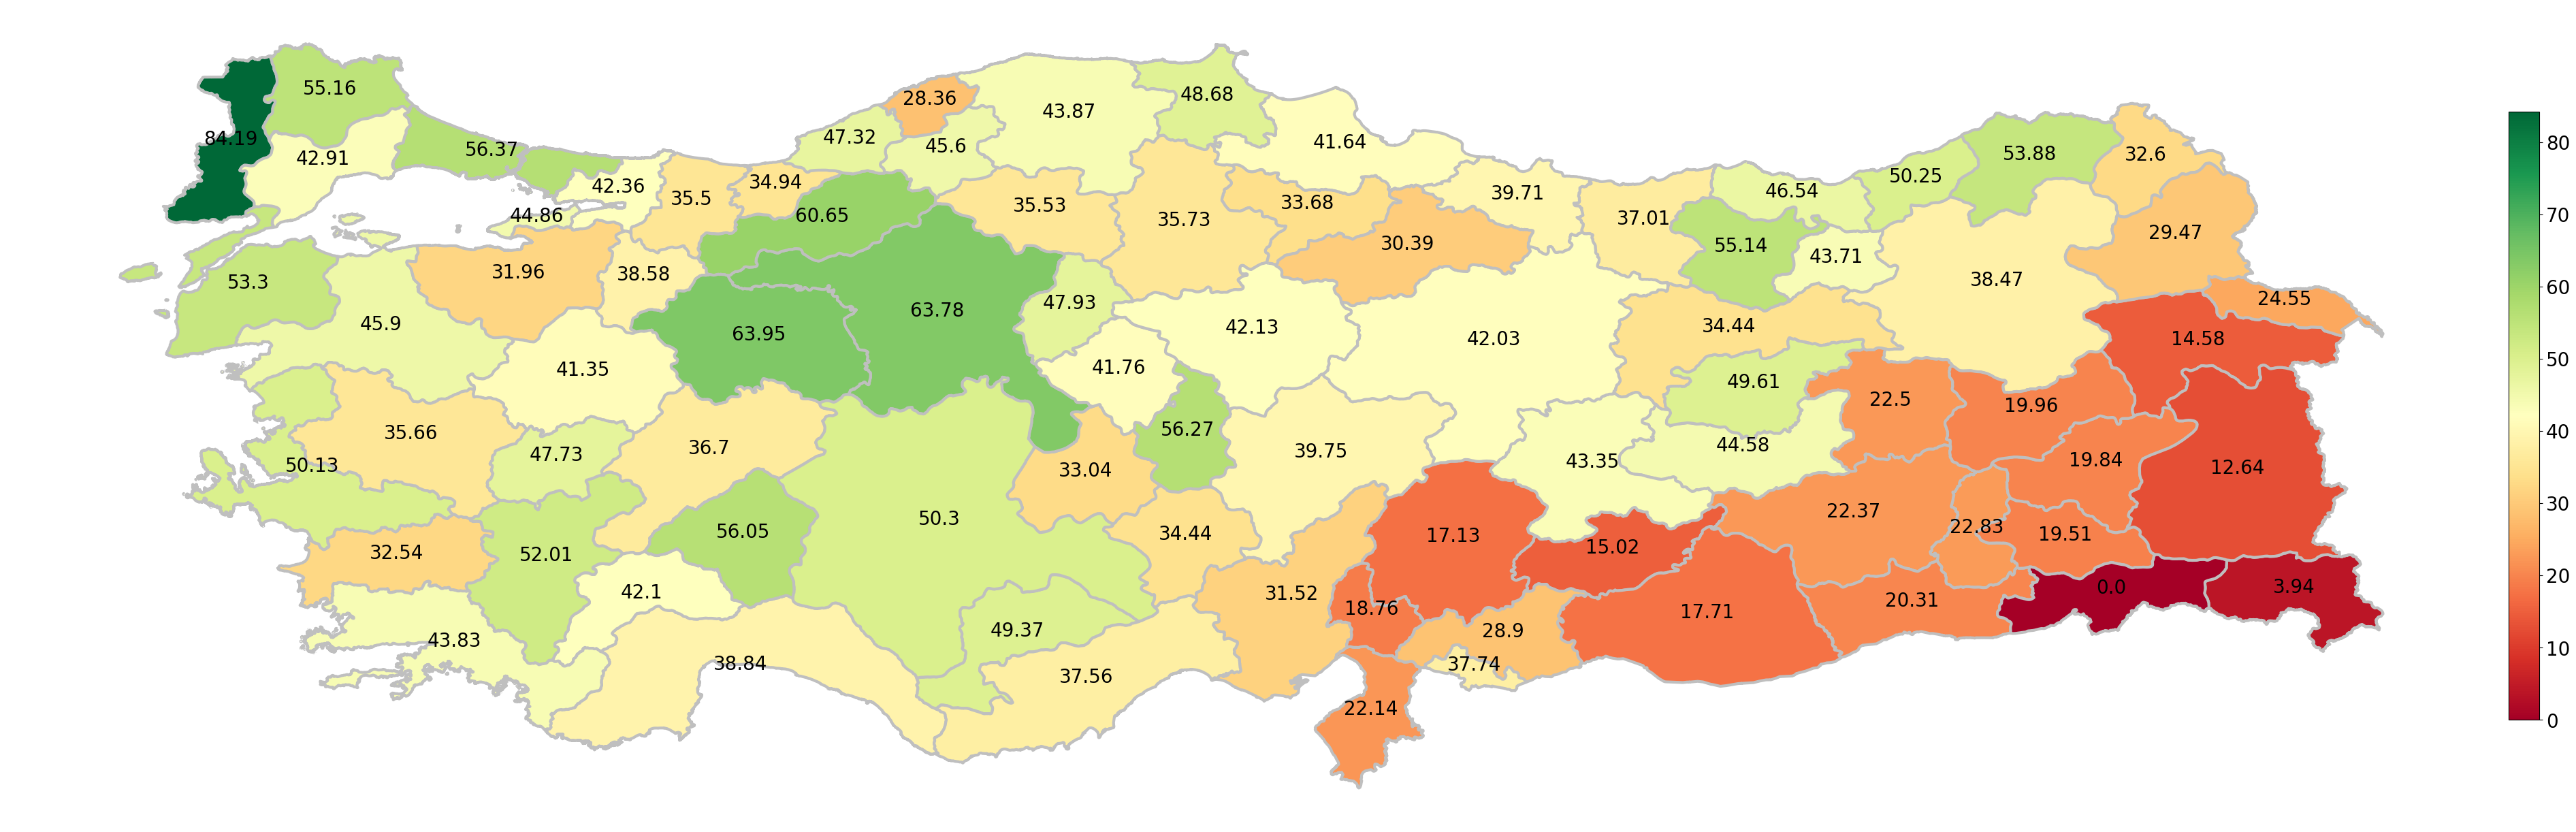

In [24]:
df_data_2020 = pd.read_csv("Results/data_2020.csv")
df_data_2020['Province'] = provinces
df_scores_2020 = pd.DataFrame()
df_scores_2020['Province'] = df_data_2020['Province']
df_scores_2020['Index'] = df_data_2020['Index']
df_scores_2020['Province'] = provinces_en
merged_2020 = shp_tur.set_index('adm1_en').join(df_scores_2020.set_index('Province'))
merged_2020.drop(columns=['adm1_tr', 'adm0_tr'], axis=1, inplace=True)

fig, ax = plt.subplots(1, figsize=(48, 48))
ax.axis('off')
#ax.set_title('Livability of Turkish Provinces in 2021',
#             fontdict={'fontsize': '18', 'fontweight' : '8'}, y=1.2)
fig = merged_2020.plot(column='Index', cmap='RdYlGn', linewidth=3.0, ax=ax, edgecolor='0.75')

norm = mplcolors.Normalize(vmin=merged_2020['Index'].min(), vmax=merged_2020['Index'].max())
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='RdYlGn'), 
             ax=ax, location='right', shrink=0.5, pad=0.005, fraction=0.012)

for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)

merged_2020.apply(lambda x: ax.annotate(text=x['Index'],
                                   xy=(x['geometry'].centroid.x,x['geometry'].centroid.y), ha='center',
                                  fontsize=20), axis=1)

plt.show()
#plt.savefig("tur_2021.png",dpi=500, format='png', transparent=False)







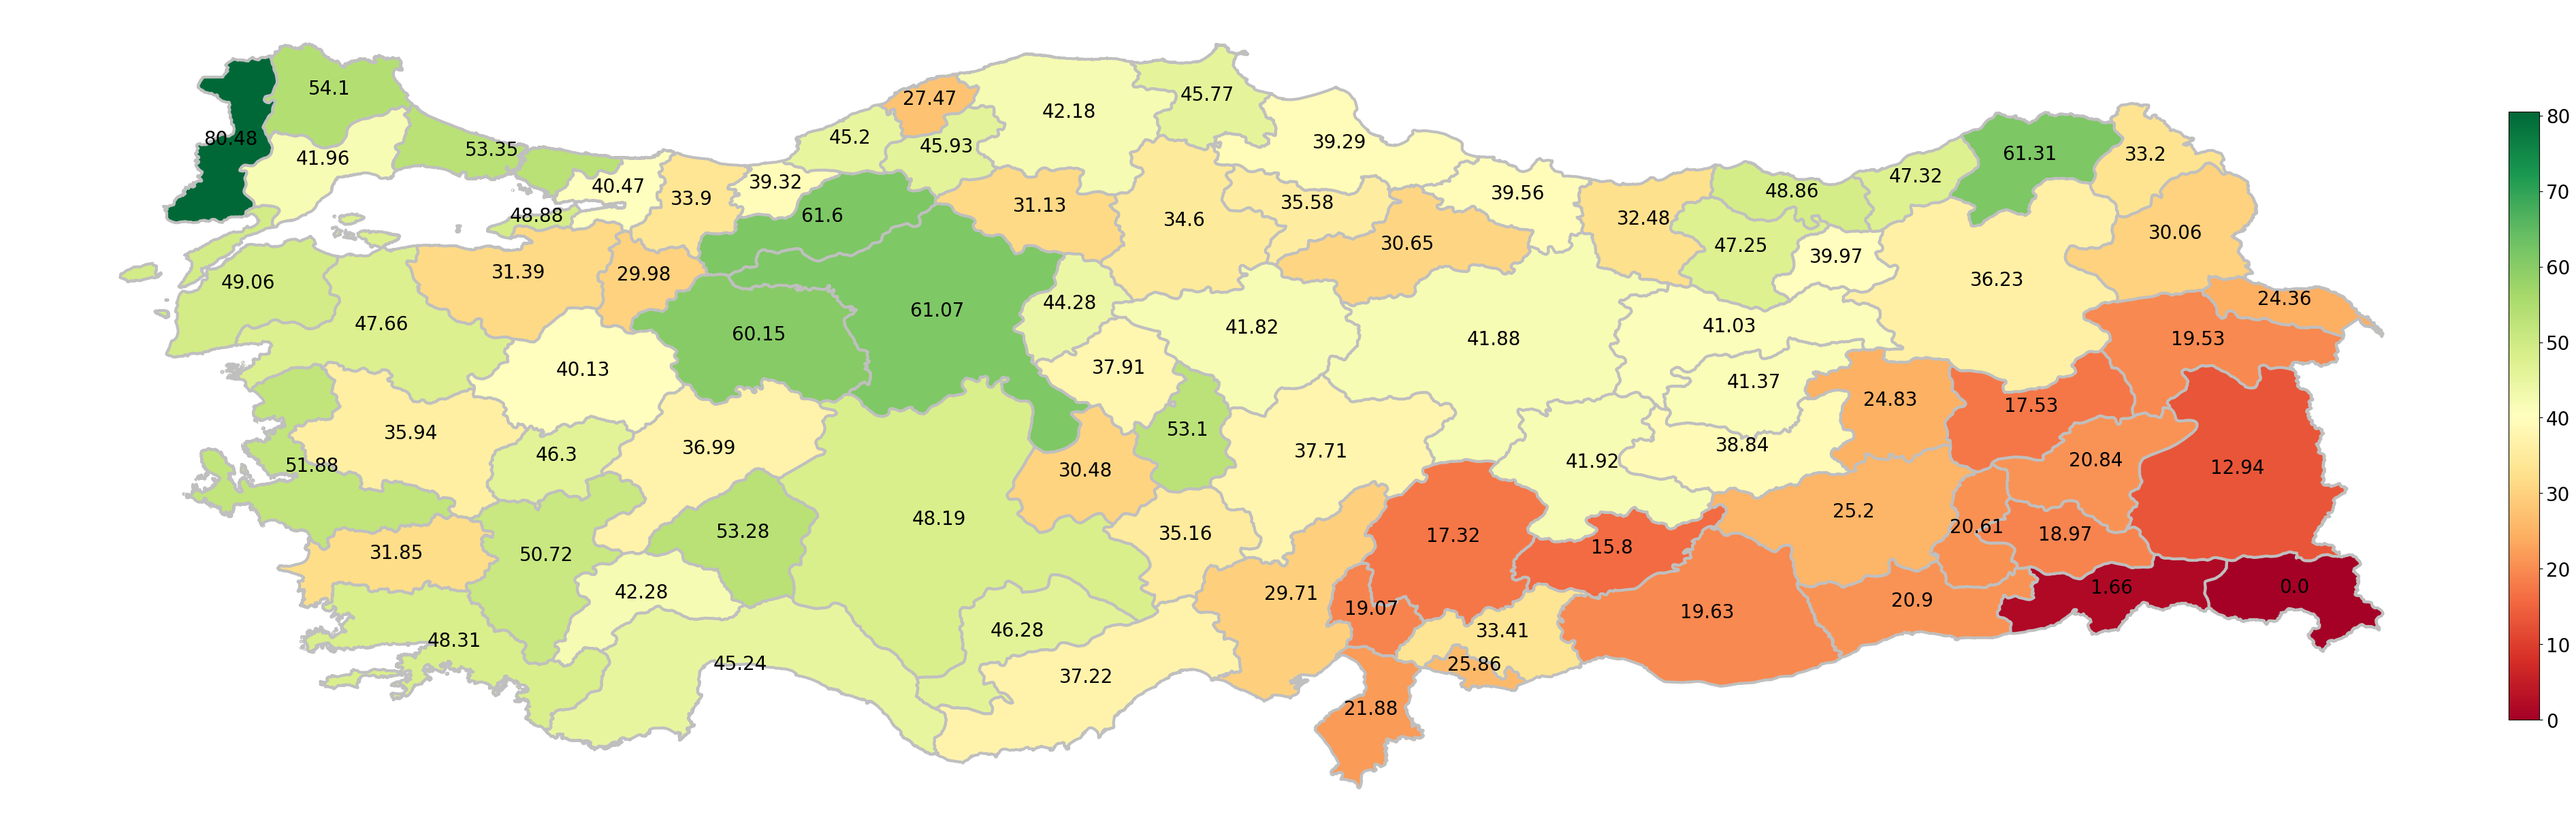

In [26]:
df_data_2019 = pd.read_csv("Results/data_2019.csv")
df_data_2019['Province'] = provinces
df_scores_2019 = pd.DataFrame()
df_scores_2019['Province'] = df_data_2019['Province']
df_scores_2019['Index'] = df_data_2019['Index']
df_scores_2019['Province'] = provinces_en
merged_2019 = shp_tur.set_index('adm1_en').join(df_scores_2019.set_index('Province'))
merged_2019.drop(columns=['adm1_tr', 'adm0_tr'], axis=1, inplace=True)

fig, ax = plt.subplots(1, figsize=(48, 48))
ax.axis('off')
#ax.set_title('Livability of Turkish Provinces in 2021',
#             fontdict={'fontsize': '18', 'fontweight' : '8'}, y=1.2)
fig = merged_2019.plot(column='Index', cmap='RdYlGn', linewidth=3.0, ax=ax, edgecolor='0.75')

norm = mplcolors.Normalize(vmin=merged_2019['Index'].min(), vmax=merged_2019['Index'].max())
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='RdYlGn'), 
             ax=ax, location='right', shrink=0.5, pad=0.005, fraction=0.012)

for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)

merged_2019.apply(lambda x: ax.annotate(text=x['Index'],
                                   xy=(x['geometry'].centroid.x,x['geometry'].centroid.y), ha='center',
                                  fontsize=20), axis=1)

plt.show()
#plt.savefig("tur_2021.png",dpi=500, format='png', transparent=False)



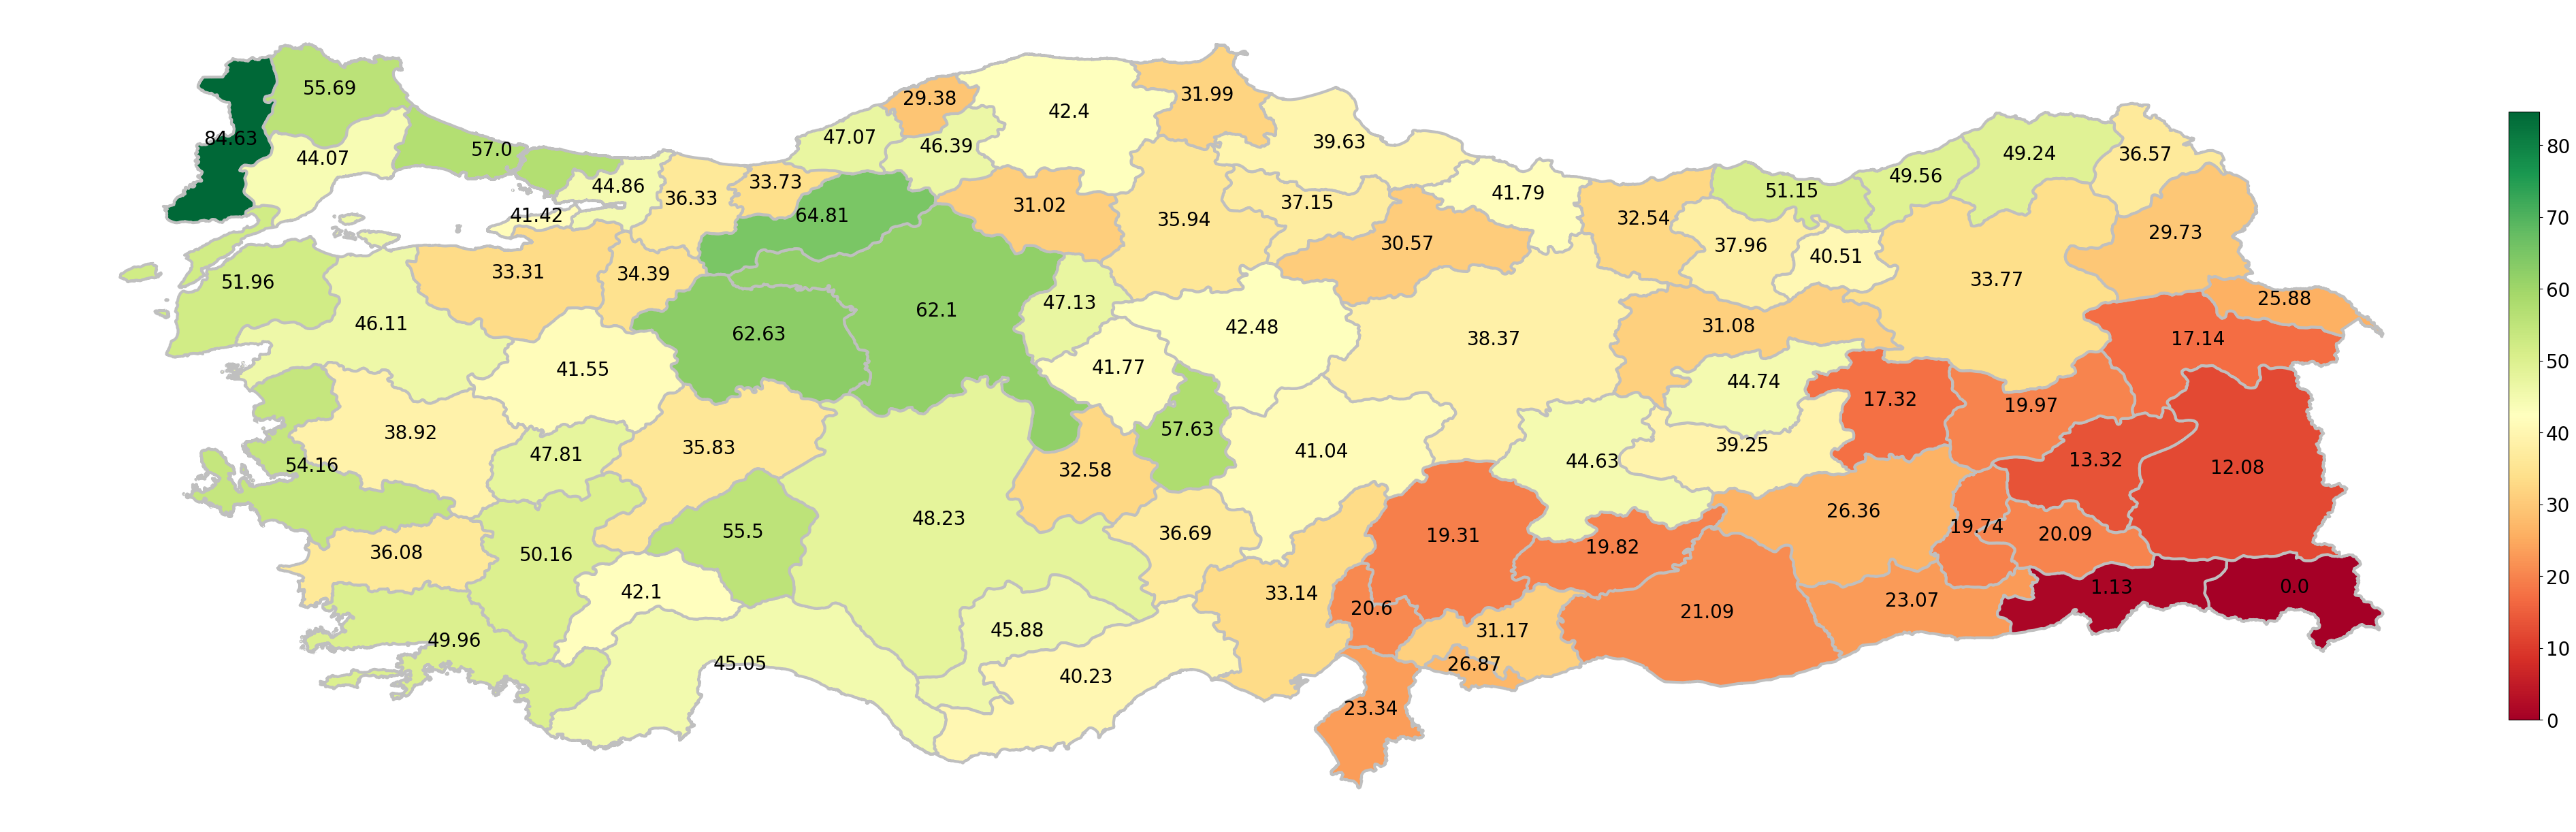

In [28]:
df_data_2018 = pd.read_csv("Results/data_2018.csv")
df_data_2018['Province'] = provinces
df_scores_2018 = pd.DataFrame()
df_scores_2018['Province'] = df_data_2018['Province']
df_scores_2018['Index'] = df_data_2018['Index']
df_scores_2018['Province'] = provinces_en
merged_2018 = shp_tur.set_index('adm1_en').join(df_scores_2018.set_index('Province'))
merged_2018.drop(columns=['adm1_tr', 'adm0_tr'], axis=1, inplace=True)

fig, ax = plt.subplots(1, figsize=(48, 48))
ax.axis('off')
#ax.set_title('Livability of Turkish Provinces in 2021',
#             fontdict={'fontsize': '18', 'fontweight' : '8'}, y=1.2)
fig = merged_2018.plot(column='Index', cmap='RdYlGn', linewidth=3.0, ax=ax, edgecolor='0.75')

norm = mplcolors.Normalize(vmin=merged_2018['Index'].min(), vmax=merged_2018['Index'].max())
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='RdYlGn'), 
             ax=ax, location='right', shrink=0.5, pad=0.005, fraction=0.012)

for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)

merged_2018.apply(lambda x: ax.annotate(text=x['Index'],
                                   xy=(x['geometry'].centroid.x,x['geometry'].centroid.y), ha='center',
                                  fontsize=20), axis=1)

plt.show()
#plt.savefig("tur_2021.png",dpi=500, format='png', transparent=False)



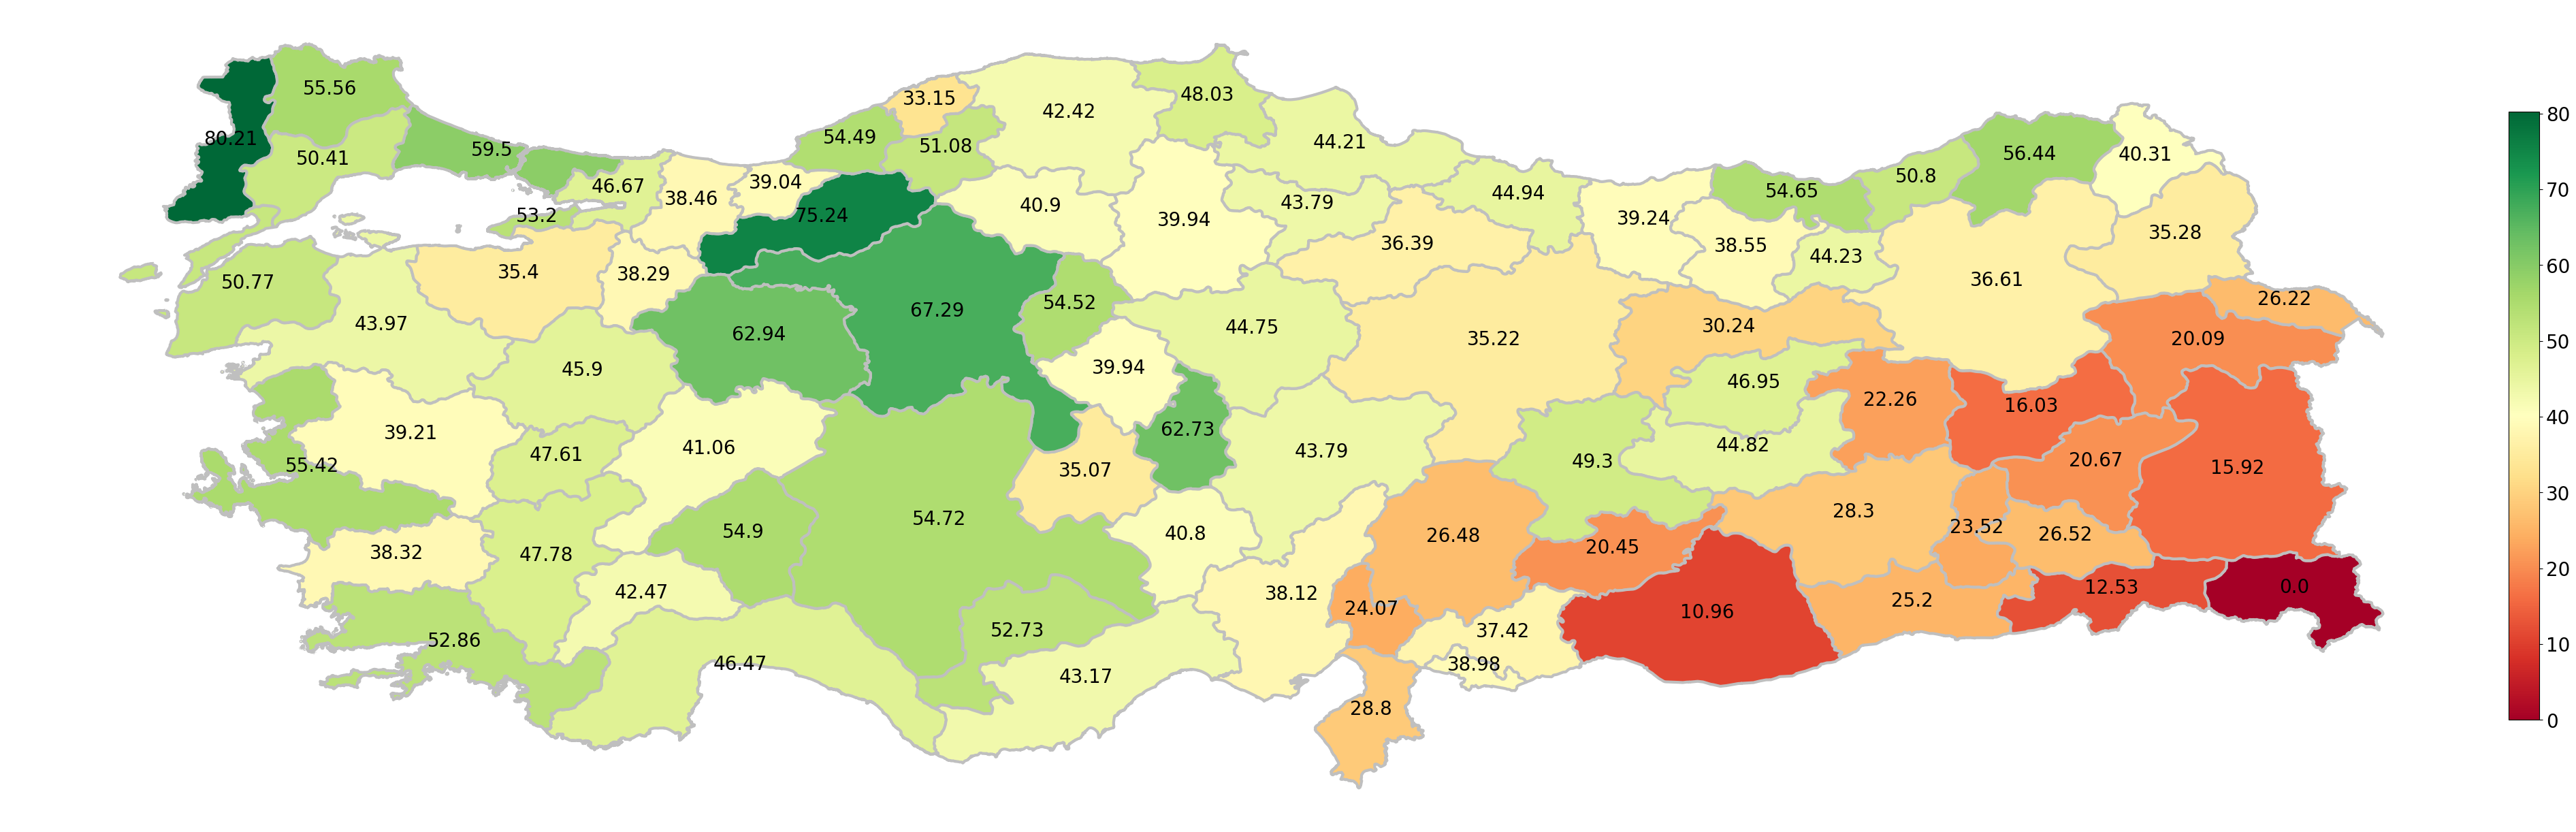

In [29]:
df_data_2017 = pd.read_csv("Results/data_2017.csv")
df_data_2017['Province'] = provinces
df_scores_2017 = pd.DataFrame()
df_scores_2017['Province'] = df_data_2017['Province']
df_scores_2017['Index'] = df_data_2017['Index']
df_scores_2017['Province'] = provinces_en
merged_2017 = shp_tur.set_index('adm1_en').join(df_scores_2017.set_index('Province'))
merged_2017.drop(columns=['adm1_tr', 'adm0_tr'], axis=1, inplace=True)

fig, ax = plt.subplots(1, figsize=(48, 48))
ax.axis('off')
#ax.set_title('Livability of Turkish Provinces in 2021',
#             fontdict={'fontsize': '18', 'fontweight' : '8'}, y=1.2)
fig = merged_2017.plot(column='Index', cmap='RdYlGn', linewidth=3.0, ax=ax, edgecolor='0.75')

norm = mplcolors.Normalize(vmin=merged_2017['Index'].min(), vmax=merged_2017['Index'].max())
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='RdYlGn'), 
             ax=ax, location='right', shrink=0.5, pad=0.005, fraction=0.012)

for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)

merged_2017.apply(lambda x: ax.annotate(text=x['Index'],
                                   xy=(x['geometry'].centroid.x,x['geometry'].centroid.y), ha='center',
                                  fontsize=20), axis=1)

plt.show()
#plt.savefig("tur_2021.png",dpi=500, format='png', transparent=False)

